In [ ]:
!pip install youtube-comment-downloader nltk matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Fetching new comments at 2024-11-15 17:39:04.464461
                                             comment                    time
0  Baby, when you first came out I was homeless, ...            1 minute ago
1  I love how he mumble rhymes "he don't want to ...           3 minutes ago
2                                    It's awesome.❤❤           7 minutes ago
3  Man they always try to play me cuz they hate m...  8 minutes ago (edited)
4                                                 🪐🐐           9 minutes ago

Overall Sentiment Results:
  Positive Score: 0.156
  Neutral Score: 0.729
  Negative Score: 0.116
  Compound Score: 1.000
  Overall Sentiment: Positive
Number of comments in the CSV file: 5161


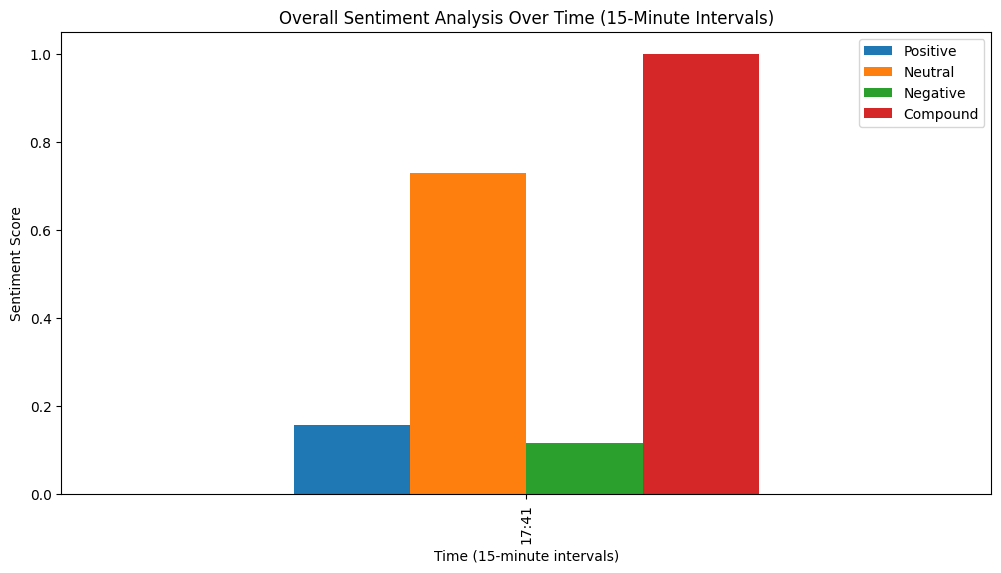

Waiting 15 minutes before the next update...


KeyboardInterrupt: 

In [ ]:
import time
import datetime
from youtube_comment_downloader import YoutubeCommentDownloader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

# Install and initialize VADER lexicon and YouTube Comment Downloader
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
downloader = YoutubeCommentDownloader()

# Define the video URL and extract the video ID
video_url = "https://www.youtube.com/watch?v=KhhN6m7Lfyw"
video_id = video_url.split("v=")[-1]

# Function to fetch comments and save them with timestamps
def fetch_and_save_comments(video_id, file_name="youtube_comments.csv"):
    with open(file_name, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file) # Pass the file object to csv.writer
        writer.writerow(["comment", "time"])
        for comment in downloader.get_comments(video_id):
            # Check if 'text' and 'time' keys exist before accessing them
            if 'text' in comment and 'time' in comment:
                writer.writerow([comment["text"], comment['time']]) # Write comment and time as a list
            else:
                print(f"Skipping comment due to missing keys: {comment}") # Print a message for debugging

# Function to calculate sentiment scores for the entire comment text
def calculate_overall_sentiment(df):
    combined_text = ' '.join(df['comment'].tolist())  # Combine all comments into a single text
    sentiment_score = sia.polarity_scores(combined_text)  # Get the overall sentiment score

    overall_sentiment = "Positive" if sentiment_score['compound'] >= 0.05 else ("Negative" if sentiment_score['compound'] <= -0.05 else "Neutral")

    # Display overall sentiment results
    print("\nOverall Sentiment Results:")
    print(f"  Positive Score: {sentiment_score['pos']:.3f}")
    print(f"  Neutral Score: {sentiment_score['neu']:.3f}")
    print(f"  Negative Score: {sentiment_score['neg']:.3f}")
    print(f"  Compound Score: {sentiment_score['compound']:.3f}")
    print(f"  Overall Sentiment: {overall_sentiment}")

    return sentiment_score, overall_sentiment

# Function to plot overall sentiment scores
def plot_sentiment_over_time(sentiment_data):
    df_sentiment = pd.DataFrame(sentiment_data)
    df_sentiment.plot(x='time', y=['positive', 'neutral', 'negative', 'compound'], kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel("Time (15-minute intervals)")
    plt.ylabel("Sentiment Score")
    plt.title("Overall Sentiment Analysis Over Time (15-Minute Intervals)")
    plt.legend(["Positive", "Neutral", "Negative", "Compound"])
    plt.show()

# Main loop to fetch, analyze, and plot every 15 minutes
sentiment_data = {"time": [], "positive": [], "neutral": [], "negative": [], "compound": []}

while True:
    # Step 1: Fetch new comments and save with timestamps
    print(f"\nFetching new comments at {datetime.datetime.now()}")
    fetch_and_save_comments(video_id)

    # Step 2: Load all comments from the file for analysis
    df_all_comments = pd.read_csv("youtube_comments.csv",)
    print(df_all_comments.head())
    # Step 3: Calculate overall sentiment for all comments
    sentiment_score, overall_sentiment = calculate_overall_sentiment(df_all_comments)

    # Step 4: Store sentiment scores with the current timestamp
    sentiment_data["time"].append(datetime.datetime.now().strftime('%H:%M'))
    sentiment_data["positive"].append(sentiment_score["pos"])
    sentiment_data["neutral"].append(sentiment_score["neu"])
    sentiment_data["negative"].append(sentiment_score["neg"])
    sentiment_data["compound"].append(sentiment_score["compound"])
    print(f"Number of comments in the CSV file: {len(df_all_comments)}")

    # Step 5: Plot sentiment scores over time
    plot_sentiment_over_time(sentiment_data)

    # Step 6: Wait for 15 minutes before the next update
    print("Waiting 15 minutes before the next update...")
    time.sleep(900)  # 15 minutes in seconds
